In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from pandas.plotting import scatter_matrix

data = pd.read_csv('/content/60-Seconds_features_detailed.csv')
data_split = pd.read_csv('/content/10-Seconds-Split_features_detailed.csv')
data.head()

File       Tempo  Chroma_mean  \
0                   Alicia Keys - No One.mp3   89.102909     0.383054   
1            Jeremih - Love Don't Change.mp3  117.453835     0.348815   
2  Rihanna, Ne-Yo - Hate That I Love You.mp3   95.703125     0.363361   
3                         Anzyeity - omg.mp3  143.554688     0.475203   
4               Ne-Yo - One In A Million.mp3   99.384014     0.402866   

   Chroma_var  SpectralCentroid_mean  SpectralCentroid_var  \
0    0.095803            2304.339387         390481.420300   
1    0.091630            2736.366456         799755.753489   
2    0.090061            2725.915589         436054.400192   
3    0.088529            2249.509619         382819.686141   
4    0.089609            2493.034731         730837.565233   

   ZeroCrossingRate_mean  ZeroCrossingRate_var  OnsetStrength_mean  \
0               0.095650              0.004443            1.352238   
1               0.132770              0.005417            1.145082   
2               0.132083              0.003882            1.384585   
3               0.062357              0.003070            1.193103   
4               0.118709              0.007237            1.485867   

   OnsetStrength_var  ...  MFCC5_variance  MFCC6_variance  MFCC7_variance  \
0           3.513953  ...      258.712600        94.95365       149.10420   
1           1.334099  ...      474.242950       238.72221       183.43536   
2           1.896600  ...      182.953350       127.25174       115.69221   
3           0.630288  ...      121.031044        57.76060        59.40749   
4           3.247485  ...      221.810440       155.06172       164.96953   

   MFCC8_variance  MFCC9_variance  MFCC10_variance  MFCC11_variance  \
0       143.99918      140.931870       179.947660       119.211200   
1       163.78802      115.149086        90.484570        75.910310   
2        82.65518       92.019230       101.468040        92.848520   
3        53.62875       50.963062        41.573475        45.930073   
4       129.66700      107.968910       119.377670        81.670850   

   MFCC12_variance  MFCC13_variance  Label  
0       109.822170        102.14817    RnB  
1       110.853230         82.39883    RnB  
2        83.344284         95.64602    RnB  
3        37.656925         48.32094    RnB  
4       107.092140         90.11787    RnB  

[5 rows x 45 columns]

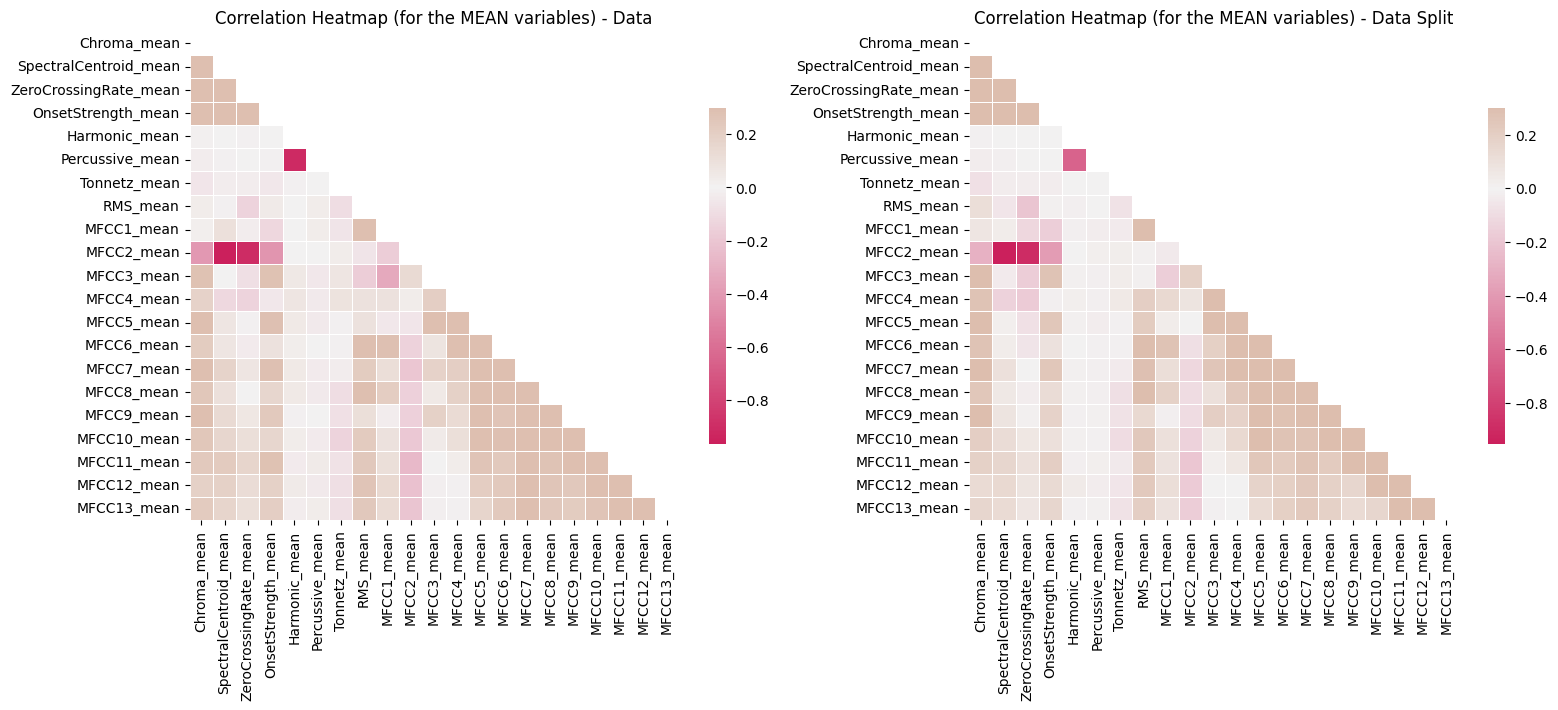

In [18]:
data = pd.read_csv('/content/60-Seconds_features_detailed.csv')
data_split = pd.read_csv('/content/10-Seconds-Split_features_detailed.csv')

# Computing the Correlation Matrices
spike_cols_data = [col for col in data.columns if 'mean' in col]
corr_data = data[spike_cols_data].corr()

spike_cols_data_split = [col for col in data_split.columns if 'mean' in col]
corr_data_split = data_split[spike_cols_data_split].corr()

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s=90, l=45, n=5)
mask_data = np.triu(np.ones_like(corr_data))

# Draw the heatmap for the first matrix
sns.heatmap(corr_data, ax=axes[0],mask = mask_data, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
axes[0].set_title('Correlation Heatmap (for the MEAN variables) - Data')

# Draw the heatmap for the second matrix
sns.heatmap(corr_data_split, ax=axes[1],mask=mask_data, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
axes[1].set_title('Correlation Heatmap (for the MEAN variables) - Data Split')

# Adjust layout
plt.tight_layout()
plt.show()


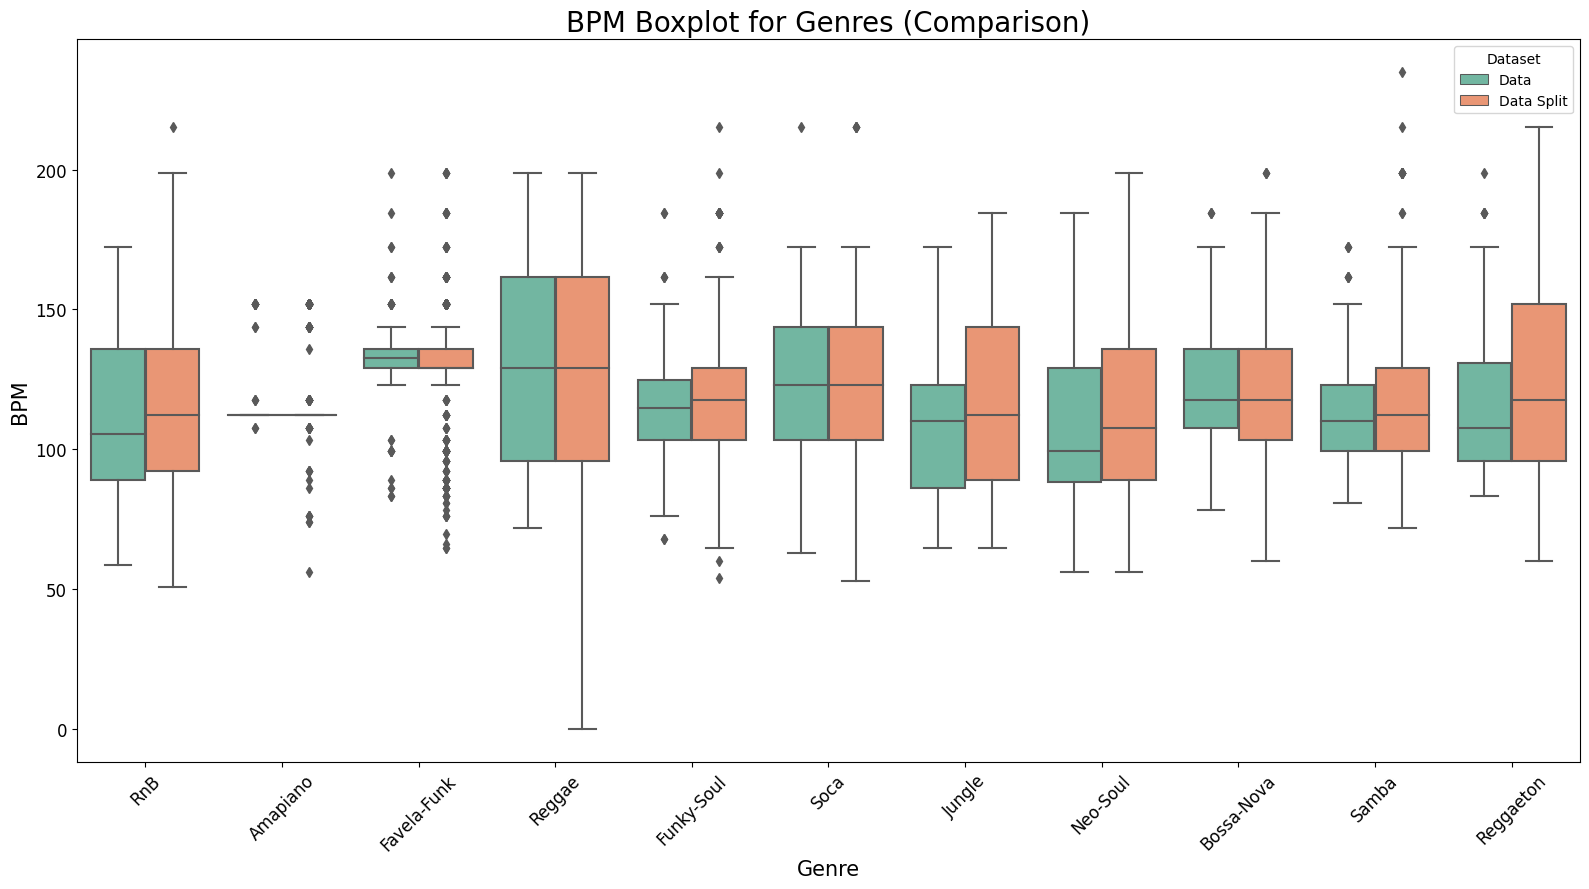

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine data and data_split for comparison
combined_data = pd.concat([data, data_split], keys=['Data', 'Data Split'])

# Set up the matplotlib figure
plt.figure(figsize=(16, 9))

# Create a boxplot for BPMs of corresponding genres in each dataset
sns.boxplot(x="Label", y="Tempo", hue=combined_data.index.get_level_values(0), data=combined_data, palette='Set2')

plt.title('BPM Boxplot for Genres (Comparison)', fontsize=20)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("BPM", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Dataset")
plt.tight_layout()
plt.savefig("BPM_Boxplot_Comparison.jpg")
plt.show()


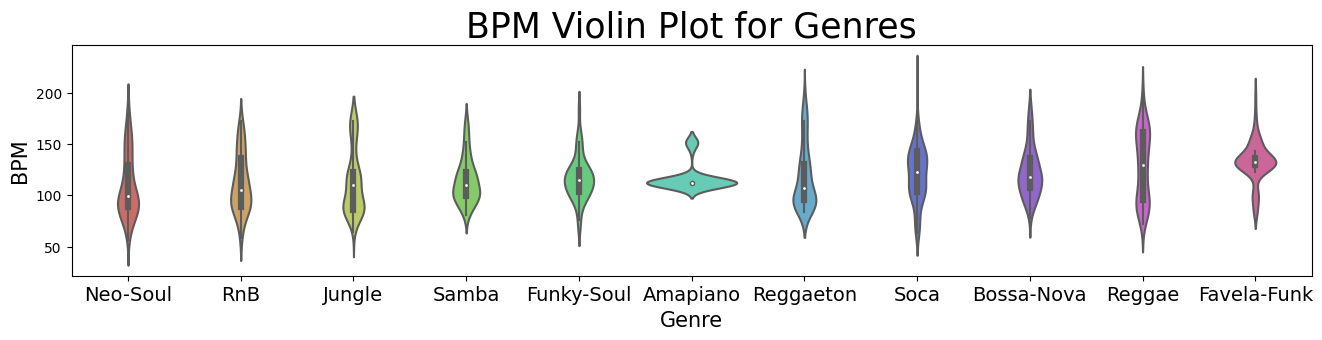

In [20]:
x = data[["Label", "Tempo"]]

mean_by_genre = x.groupby(["Label"])["Tempo"].mean().sort_values(ascending=True)

f, ax = plt.subplots(figsize=(16, 3))
sns.violinplot(x="Label", y="Tempo", data=x, order=mean_by_genre.index, palette='hls')

plt.title('BPM Violin Plot for Genres', fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("BPM", fontsize=15)
plt.savefig("BPM Violin Plot.jpg")

plt.show()

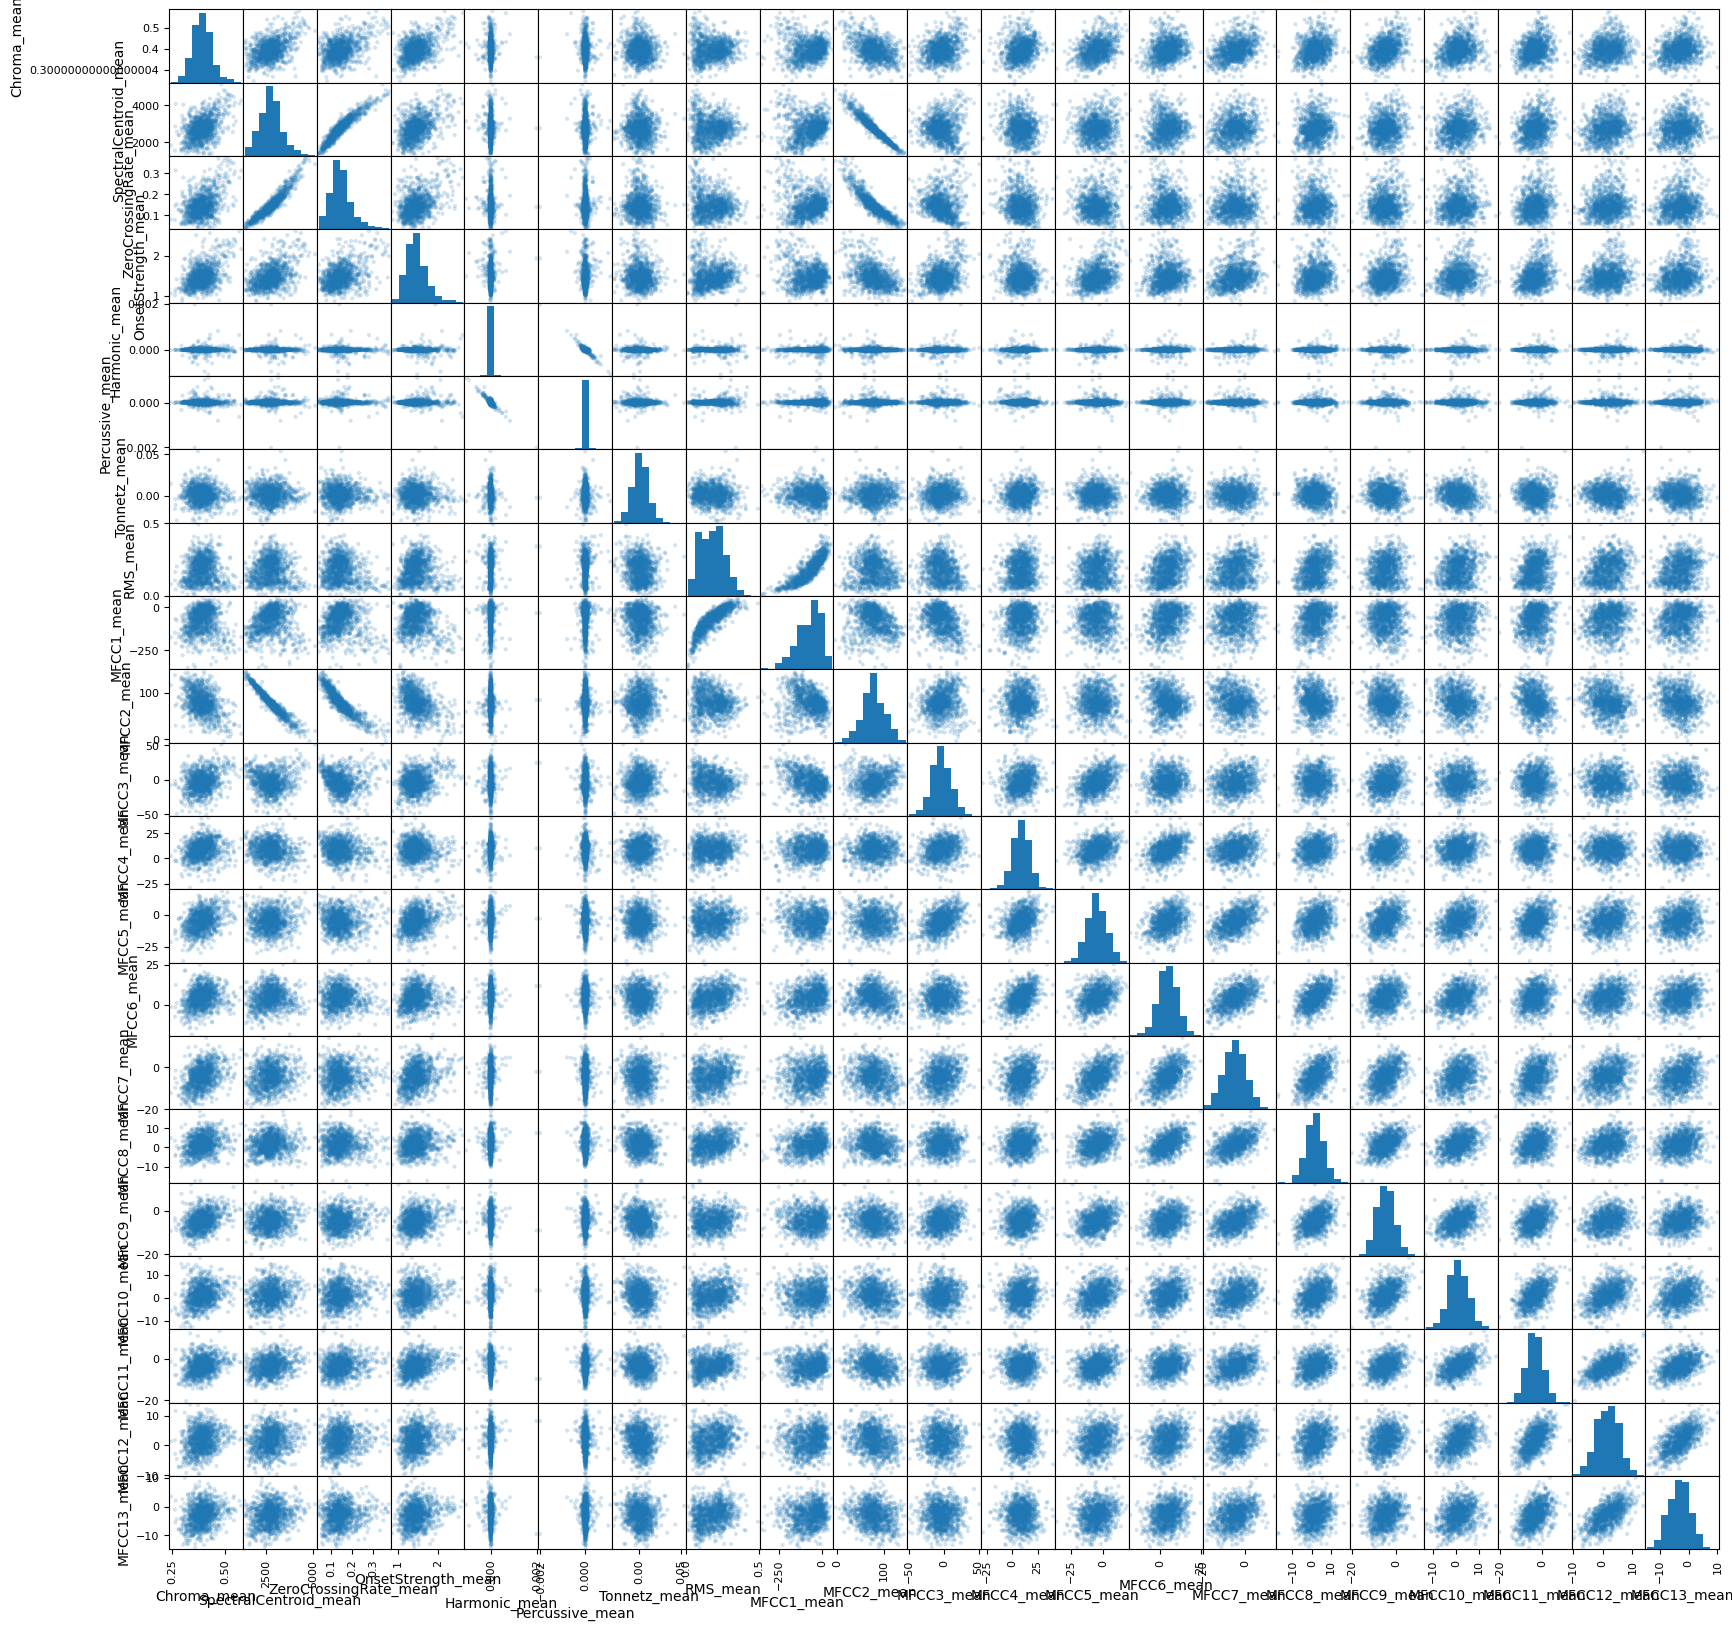

In [21]:
spike_cols = [col for col in data.columns if 'mean' in col]
axes = scatter_matrix(data[spike_cols], alpha = 0.2, figsize = (20, 20))
axes[0,0].get_figure().show()

# New section

In [22]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['Label']
X = data.loc[:, data.columns != 'Label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.20873809, 0.15679413])

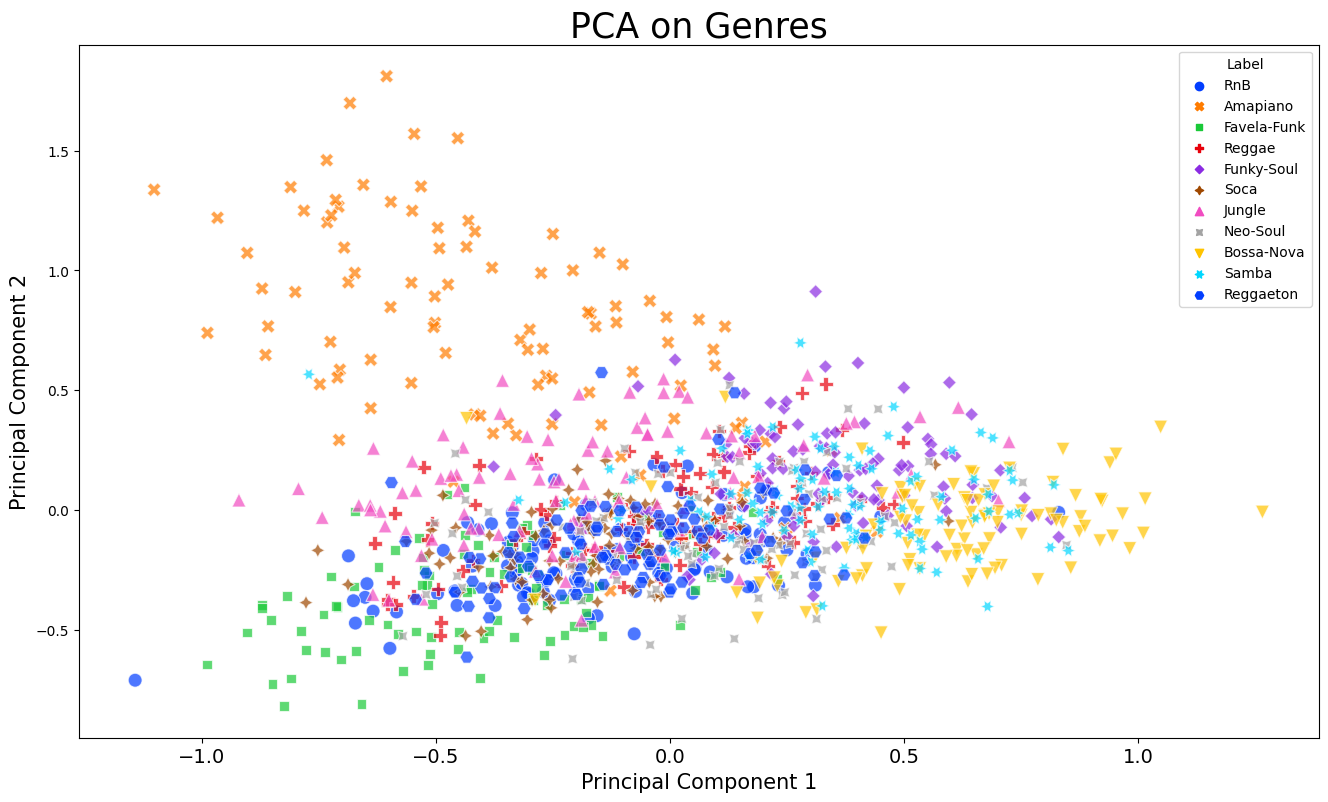

In [23]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "Label", palette="bright", style="Label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

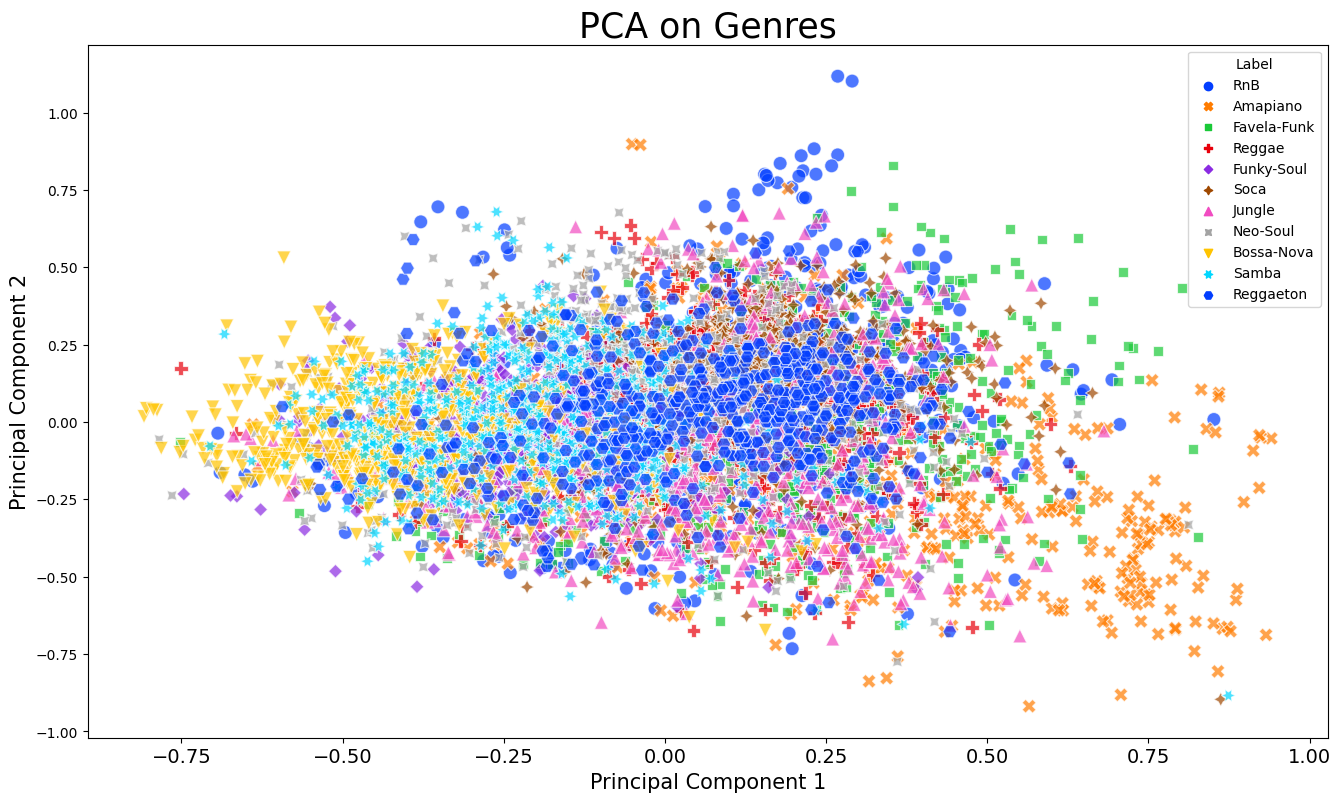

In [24]:
from sklearn import preprocessing

data = data_split.iloc[0:, 1:]
y = data['Label']
X = data.loc[:, data.columns != 'Label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "Label", palette="bright", style="Label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [26]:
#data = pd.read_csv(f'../data/60-Seconds_features_detailed.csv')
data = pd.read_csv(f'/content/60-Seconds_features_detailed.csv')

data = data.iloc[0:, 1:]
data.head()

Tempo  Chroma_mean  Chroma_var  SpectralCentroid_mean  \
0   89.102909     0.383054    0.095803            2304.339387   
1  117.453835     0.348815    0.091630            2736.366456   
2   95.703125     0.363361    0.090061            2725.915589   
3  143.554688     0.475203    0.088529            2249.509619   
4   99.384014     0.402866    0.089609            2493.034731   

   SpectralCentroid_var  ZeroCrossingRate_mean  ZeroCrossingRate_var  \
0         390481.420300               0.095650              0.004443   
1         799755.753489               0.132770              0.005417   
2         436054.400192               0.132083              0.003882   
3         382819.686141               0.062357              0.003070   
4         730837.565233               0.118709              0.007237   

   OnsetStrength_mean  OnsetStrength_var  Harmonic_mean  ...  MFCC5_variance  \
0            1.352238           3.513953       0.000014  ...      258.712600   
1            1.145082           1.334099       0.000045  ...      474.242950   
2            1.384585           1.896600       0.000016  ...      182.953350   
3            1.193103           0.630288       0.000160  ...      121.031044   
4            1.485867           3.247485      -0.000153  ...      221.810440   

   MFCC6_variance  MFCC7_variance  MFCC8_variance  MFCC9_variance  \
0        94.95365       149.10420       143.99918      140.931870   
1       238.72221       183.43536       163.78802      115.149086   
2       127.25174       115.69221        82.65518       92.019230   
3        57.76060        59.40749        53.62875       50.963062   
4       155.06172       164.96953       129.66700      107.968910   

   MFCC10_variance  MFCC11_variance  MFCC12_variance  MFCC13_variance  Label  
0       179.947660       119.211200       109.822170        102.14817    RnB  
1        90.484570        75.910310       110.853230         82.39883    RnB  
2       101.468040        92.848520        83.344284         95.64602    RnB  
3        41.573475        45.930073        37.656925         48.32094    RnB  
4       119.377670        81.670850       107.092140         90.11787    RnB  

[5 rows x 44 columns]

In [27]:
y = data['Label'] # genre variable.
X = data.loc[:, data.columns != 'Label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale.

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [29]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [30]:
print(len(data))
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

1100
Accuracy Naive Bayes : 0.57273 

Accuracy Stochastic Gradient Descent : 0.42727 

Accuracy KNN : 0.53939 

Accuracy Decission trees : 0.43939 

Accuracy Random Forest : 0.6303 

Accuracy Support Vector Machine : 0.60303 

Accuracy Logistic Regression : 0.59091 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy Neural Nets : 0.54848 

Accuracy Cross Gradient Booster : 0.58485 

Accuracy Cross Gradient Booster (Random Forest) : 0.54545 



In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, LearningCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Split data into training and temporary set (70%) and a temporary set (30%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set further into training (50%) and validation (50%)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_dist = {
    'n_estimators': range(700, 3000)          # Number of trees in the forest (50 to 200)
}

# Create GridSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=5, cv=5, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(best_params)

# Train the Random Forest with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Validate the model
y_valid_pred = best_rf_classifier.predict(X_valid)
accuracy = accuracy_score(y_valid, y_valid_pred)
print("Validation Accuracy:", accuracy)

# Test the model
y_test_pred = best_rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..................................n_estimators=1560; total time=   4.6s
[CV] END ..................................n_estimators=1560; total time=   4.0s
[CV] END ..................................n_estimators=1560; total time=   4.4s
[CV] END ..................................n_estimators=1560; total time=   4.4s
[CV] END ..................................n_estimators=1560; total time=   4.1s
[CV] END ..................................n_estimators=1994; total time=   5.7s
[CV] END ..................................n_estimators=1994; total time=   5.2s
[CV] END ..................................n_estimators=1994; total time=   5.7s
[CV] END ..................................n_estimators=1994; total time=   5.2s
[CV] END ..................................n_estimators=1994; total time=   5.6s
[CV] END ..................................n_estimators=1830; total time=   4.8s
[CV] END ..................................n_esti

              precision    recall  f1-score   support

    Amapiano       0.79      0.88      0.83        25
  Bossa-Nova       0.65      0.76      0.70        29
 Favela-Funk       0.69      0.71      0.70        31
  Funky-Soul       0.41      0.61      0.49        28
      Jungle       0.62      0.36      0.45        28
    Neo-Soul       0.69      0.74      0.71        34
      Reggae       0.76      0.46      0.57        35
   Reggaeton       0.56      0.65      0.60        23
         RnB       0.58      0.58      0.58        33
       Samba       0.60      0.67      0.63        27
        Soca       0.66      0.57      0.61        37

    accuracy                           0.63       330
   macro avg       0.64      0.63      0.63       330
weighted avg       0.64      0.63      0.62       330



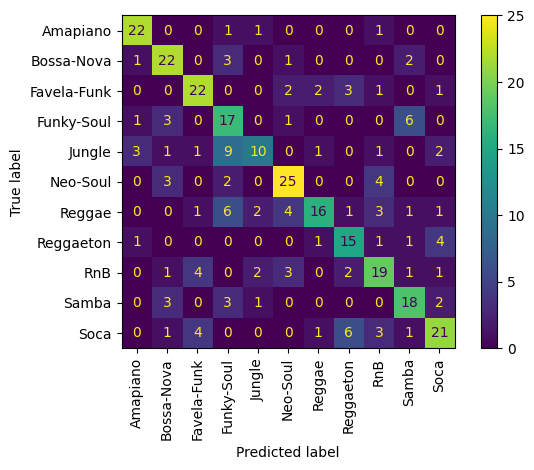

In [32]:
print(classification_report(y_test, y_test_pred))

ConfusionMatrixDisplay.from_estimator(
    best_rf_classifier, X_test, y_test, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

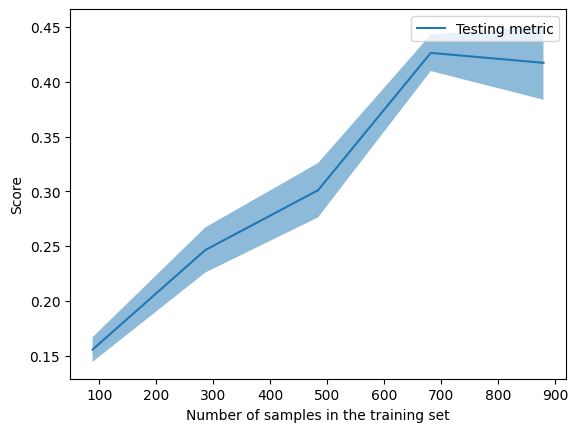

In [33]:
from sklearn.model_selection import RandomizedSearchCV, LearningCurveDisplay
tree = DecisionTreeClassifier(random_state=0)
LearningCurveDisplay.from_estimator(tree, X, y)
plt.show()

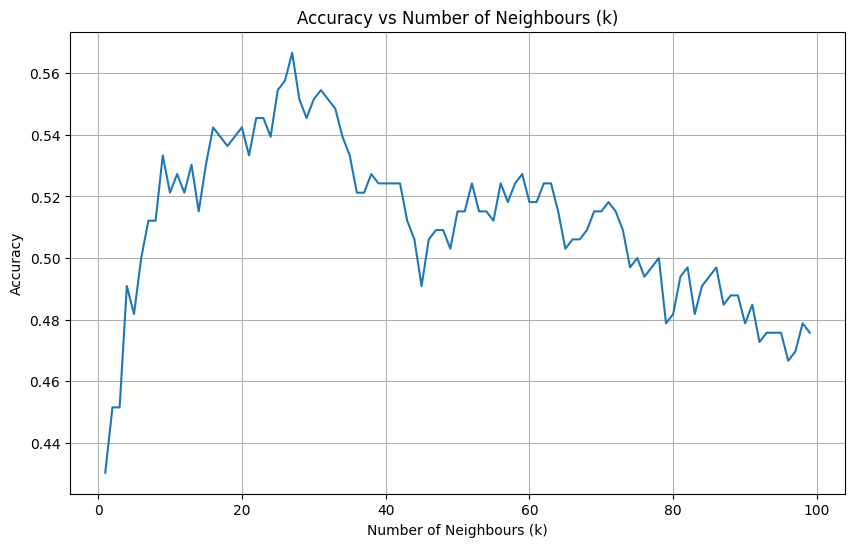

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
k_values = [i for i in range(1, 100)]

k_values_list = []
accuracies = []

for k in k_values:
    kmeans = KNeighborsClassifier(n_neighbors=k)
    kmeans.fit(X_train, y_train)
    preds = kmeans.predict(X_test)
    accuracy=accuracy_score(y_test, preds)
    k_values_list.append(k)
    accuracies.append(accuracy)

# Plot k values against accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values_list, accuracies)
plt.xlabel('Number of Neighbours (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbours (k)')
plt.grid(True)
plt.show()


In [35]:
#data = pd.read_csv(f'../data/60-Seconds_features_detailed.csv')
data = pd.read_csv(f'/content/10-Seconds-Split_features_detailed.csv')
data = data.iloc[0:, 1:]

y = data['Label'] # genre variable.
X = data.loc[:, data.columns != 'Label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale.

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
encoded_classes = le.classes_

In [36]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")


Accuracy Naive Bayes : 0.47121 

Accuracy Stochastic Gradient Descent : 0.53788 

Accuracy KNN : 0.58485 

Accuracy Decission trees : 0.46717 

Accuracy Random Forest : 0.62677 

Accuracy Support Vector Machine : 0.61717 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Logistic Regression : 0.57828 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy Neural Nets : 0.52323 

Accuracy Cross Gradient Booster : 0.74899 

Accuracy Cross Gradient Booster (Random Forest) : 0.62121 



In [37]:
# Final model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)


preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

Accuracy : 0.74899 



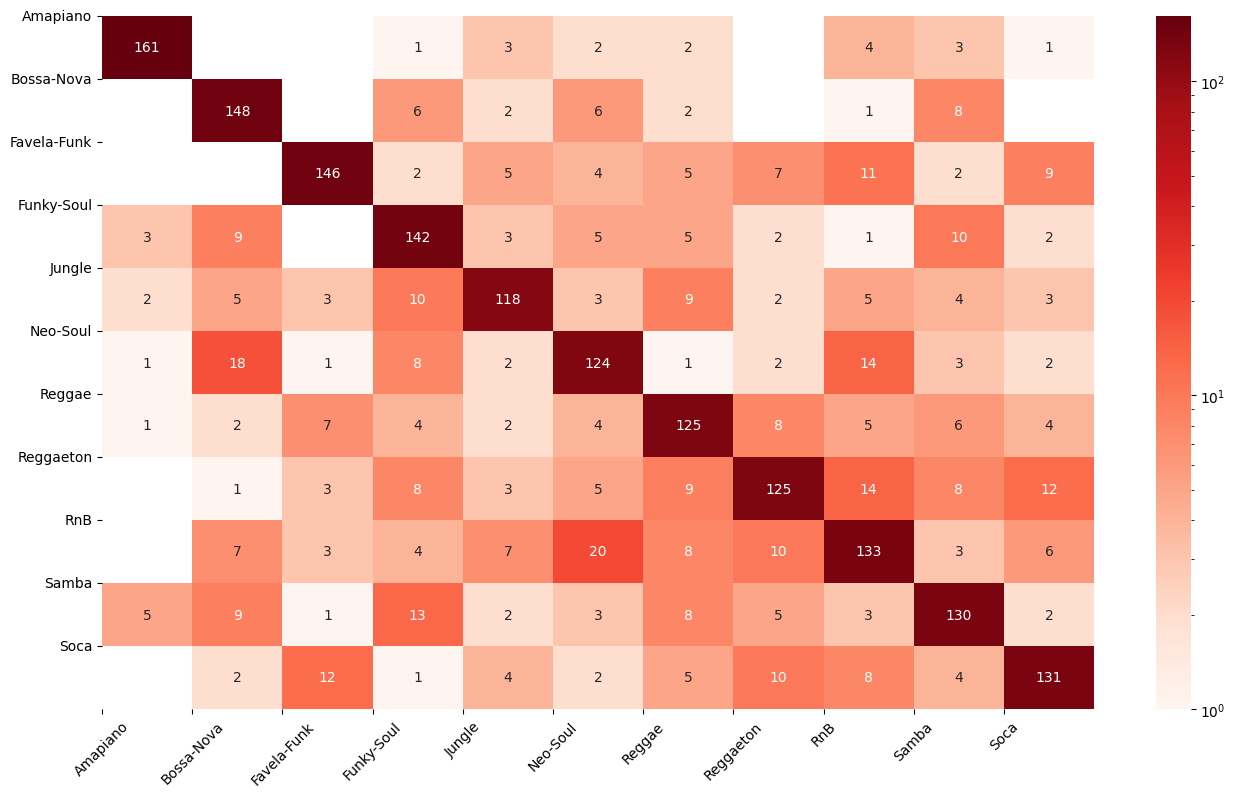

In [38]:
from matplotlib.colors import LogNorm

confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Reds", annot=True, fmt="d", norm=LogNorm())
plt.xticks(ticks=range(len(encoded_classes)), labels=encoded_classes, rotation=45)
plt.yticks(ticks=range(len(encoded_classes)), labels=encoded_classes, rotation=0)
plt.show()

In [39]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=e2e9ce69a8959181039d82bd30cca8afa753755a9acd1cb59dad9fffff760788
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [40]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=xgb, random_state=1)
perm.fit(X_test, y_test)

eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist())

In [41]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                   metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,
                     batch_size=batch_size)

In [42]:
from tensorflow import keras
from keras.models import Sequential

model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(11, activation="softmax"),

])
print(model.summary())
model_history = trainModel(model=model, epochs=1500, optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               22528     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [43]:
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping

# Define the number of folds for k-fold cross-validation
num_folds = 5

# Initialize KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True)

# Initialize list to store accuracy scores for each fold
fold_accuracies = []
best_model = None
best_val_accuracy = 0.0  # Initialize with a low value

# Loop over each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Training fold {fold + 1}/{num_folds}")

    # Get train and validation sets for the current fold
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Create the EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

    # Create a new model instance for each fold
    model = keras.models.Sequential([
        keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(11, activation="softmax"),
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model on the current fold
    history = model.fit(X_train_fold, y_train_fold,
                        validation_data=(X_val_fold, y_val_fold),
                        epochs=1500,
                        batch_size=128,
                        callbacks=[early_stopping],
                        verbose=1)

    # Evaluate the model on the same validation data to compute accuracy
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    fold_accuracies.append(val_accuracy)

    print(f"Validation accuracy for fold {fold + 1}: {val_accuracy:.4f}")

    # Store the best model based on validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model = model

# Evaluate the best model on the reserved test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy of the best model: {test_accuracy:.4f}")

# Print the average validation accuracy across all folds
print("Average validation accuracy:", np.mean(fold_accuracies))


Training fold 1/5
Epoch 1/1500
29/29 [==============================] - 2s 18ms/step - loss: 2.3838 - accuracy: 0.1236 - val_loss: 2.3225 - val_accuracy: 0.2089
Epoch 2/1500
29/29 [==============================] - 0s 11ms/step - loss: 2.2063 - accuracy: 0.2156 - val_loss: 2.0285 - val_accuracy: 0.2641
Epoch 3/1500
29/29 [==============================] - 0s 11ms/step - loss: 1.9836 - accuracy: 0.2808 - val_loss: 1.8685 - val_accuracy: 0.3225
Epoch 4/1500
29/29 [==============================] - 0s 13ms/step - loss: 1.8827 - accuracy: 0.3182 - val_loss: 1.7457 - val_accuracy: 0.4091
Epoch 5/1500
29/29 [==============================] - 0s 11ms/step - loss: 1.7660 - accuracy: 0.3688 - val_loss: 1.6366 - val_accuracy: 0.4340
Epoch 6/1500
29/29 [==============================] - 0s 10ms/step - loss: 1.7072 - accuracy: 0.3920 - val_loss: 1.6040 - val_accuracy: 0.4459
Epoch 7/1500
29/29 [==============================] - 0s 7ms/step - loss: 1.6704 - accuracy: 0.4150 - val_loss: 1.5680 - val